In [1]:
import pandas as pd

In [2]:
# Load the datasets
consumo_df = pd.read_csv('./CONSUMO.csv')
importacion_df = pd.read_csv('./IMPORTACION.csv')
precios_df = pd.read_csv('./PRECIOS.csv')

# Display the first few rows of each dataset to understand their structure
consumo_df.head(), importacion_df.head(), precios_df.head()

(        Fecha  Diesel            GLP    Regular      Super
 0  2000-01-01     0.0  194410.476190  202645.20  308156.82
 1  2000-02-01     0.0  174710.552381  205530.96  307766.31
 2  2000-03-01     0.0  189234.066667  229499.56  331910.29
 3  2000-04-01     0.0  174330.607143  210680.40  315648.08
 4  2000-05-01     0.0  191745.147619  208164.34  319667.97,
         Fecha  Diesel            GLP    Regular      Super
 0  2001-01-01     0.0  194065.738095  177776.50  373963.96
 1  2001-02-01     0.0  170703.380952  123115.99  243091.07
 2  2001-03-01     0.0  161837.371429  161726.42  312084.38
 3  2001-04-01     0.0  163048.642857  127338.74  285054.89
 4  2001-05-01     0.0  171518.861905  168730.19  300913.67,
         Fecha  Regular  Super  Diesel
 0  2002-01-01    12.19  12.55    8.95
 1  2002-02-01    11.90  12.29    8.66
 2  2002-03-01    12.17  12.58    8.69
 3  2002-04-01    13.71  14.11    9.38
 4  2002-05-01    13.79  14.16    9.44)

In [45]:
# Especificar inicio, fin y frecuencia
inicio_consumo = consumo_df['Fecha'].min()
fin_consumo = consumo_df['Fecha'].max()
frecuencia_consumo = 'Mensual'  # Dado que los datos son mensuales

inicio_importacion = importacion_df['Fecha'].min()
fin_importacion = importacion_df['Fecha'].max()
frecuencia_importacion = 'Mensual'

inicio_precios = precios_df['Fecha'].min()
fin_precios = precios_df['Fecha'].max()
frecuencia_precios = 'Mensual'
(inicio_consumo, fin_consumo, frecuencia_consumo), (inicio_importacion, fin_importacion, frecuencia_importacion), (inicio_precios, fin_precios, frecuencia_precios)


((Timestamp('2000-01-01 00:00:00'),
  Timestamp('2024-05-01 00:00:00'),
  'Mensual'),
 (Timestamp('2001-01-01 00:00:00'),
  Timestamp('2024-05-01 00:00:00'),
  'Mensual'),
 (Timestamp('2002-01-01 00:00:00'),
  Timestamp('2024-12-01 00:00:00'),
  'Mensual'))

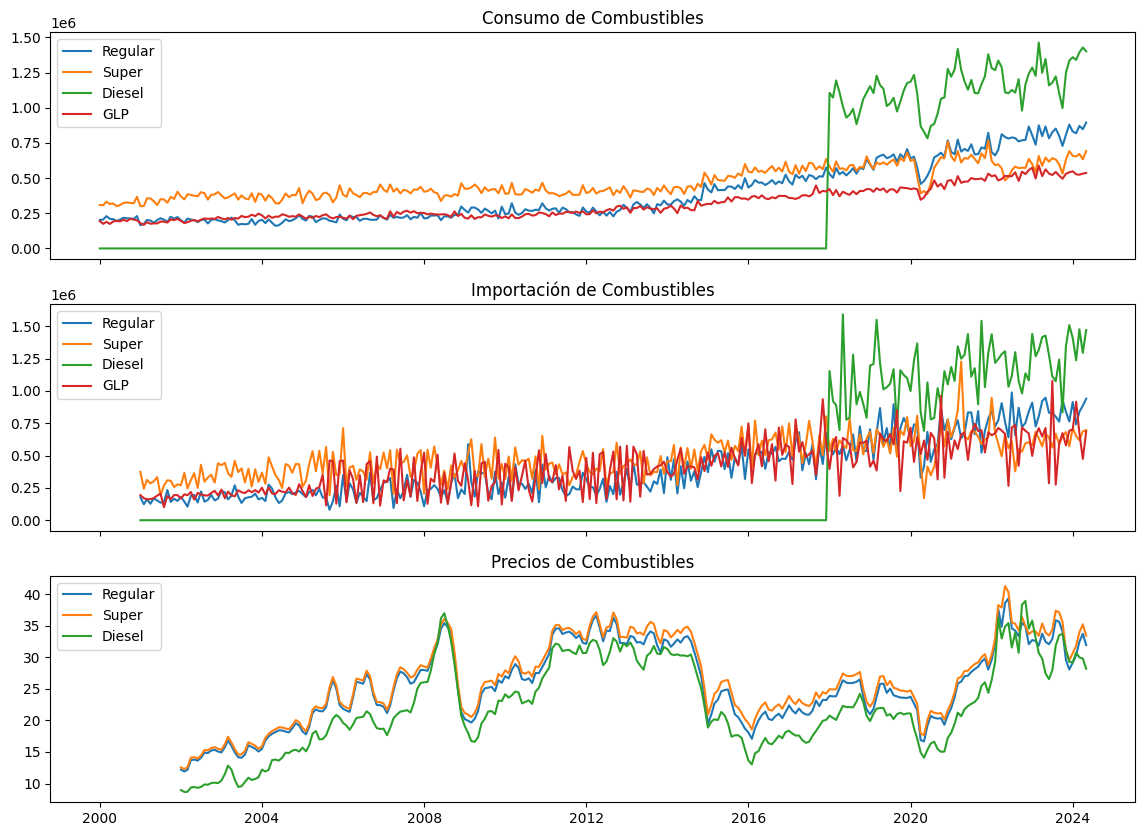

In [4]:
import matplotlib.pyplot as plt

# Convertir las fechas a datetime
consumo_df['Fecha'] = pd.to_datetime(consumo_df['Fecha'])
importacion_df['Fecha'] = pd.to_datetime(importacion_df['Fecha'])
precios_df['Fecha'] = pd.to_datetime(precios_df['Fecha'])

# Graficar
fig, ax = plt.subplots(3, 1, figsize=(14, 10), sharex=True)
ax[0].plot(consumo_df['Fecha'], consumo_df[['Regular', 'Super', 'Diesel', 'GLP']])
ax[0].set_title('Consumo de Combustibles')
ax[0].legend(['Regular', 'Super', 'Diesel', 'GLP'])

ax[1].plot(importacion_df['Fecha'], importacion_df[['Regular', 'Super', 'Diesel', 'GLP']])
ax[1].set_title('Importación de Combustibles')
ax[1].legend(['Regular', 'Super', 'Diesel', 'GLP'])

ax[2].plot(precios_df['Fecha'], precios_df[['Regular', 'Super', 'Diesel']])
ax[2].set_title('Precios de Combustibles')
ax[2].legend(['Regular', 'Super', 'Diesel'])

plt.show()


Valores faltantes antes de la interpolación:
Regular    7
Super      7
Diesel     7
dtype: int64
Valores faltantes después de la interpolación:
Regular    0
Super      0
Diesel     0
dtype: int64


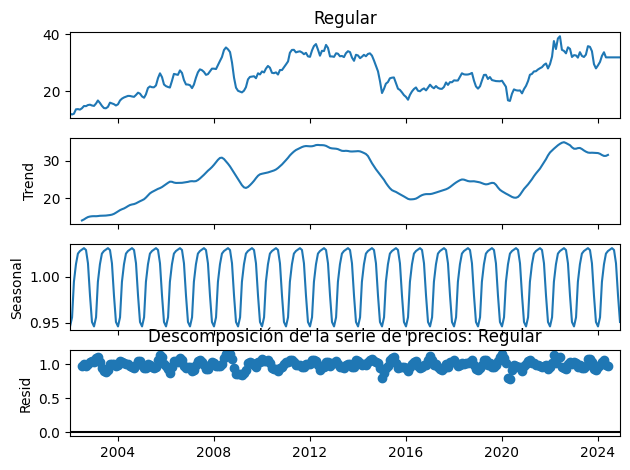

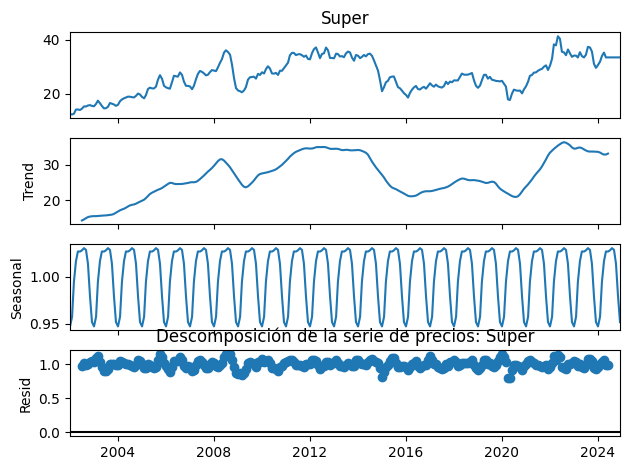

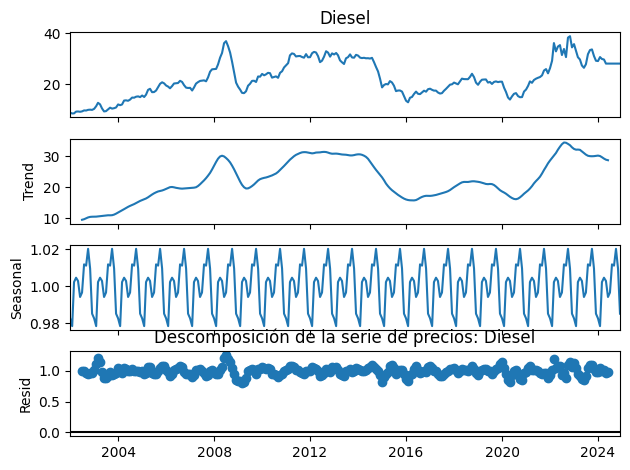

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Verificar si hay valores faltantes
missing_values = precios_df[['Regular', 'Super', 'Diesel']].isna().sum()
print("Valores faltantes antes de la interpolación:")
print(missing_values)

# Interpolar valores faltantes
precios_df[['Regular', 'Super', 'Diesel']] = precios_df[['Regular', 'Super', 'Diesel']].interpolate()

# Verificar nuevamente los valores faltantes
missing_values_after_interpolation = precios_df[['Regular', 'Super', 'Diesel']].isna().sum()
print("Valores faltantes después de la interpolación:")
print(missing_values_after_interpolation)

# Descomposición de la serie de precios
for col in ['Regular', 'Super', 'Diesel']:
    result = seasonal_decompose(precios_df.set_index('Fecha')[col], model='multiplicative', period=12)
    result.plot()
    plt.title(f'Descomposición de la serie de precios: {col}')
    plt.show()


In [32]:
from statsmodels.tsa.stattools import adfuller

# Prueba de Dickey-Fuller Aumentada
result = adfuller(precios_df['Regular'])
print('-----Regular-----')
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Prueba de Dickey-Fuller Aumentada
result2 = adfuller(precios_df['Super'])
print('-----Super-----')
print('ADF Statistic:', result2[0])
print('p-value:', result2[1])

# Prueba de Dickey-Fuller Aumentada
result3 = adfuller(precios_df['Diesel'])
print('-----Diesel-----')
print('ADF Statistic:', result3[0])
print('p-value:', result3[1])


-----Regular-----
ADF Statistic: -2.2928205623137283
p-value: 0.17429393933396736
-----Super-----
ADF Statistic: -2.253383222349678
p-value: 0.18744362609744886
-----Diesel-----
ADF Statistic: -2.52406322019542
p-value: 0.10972871576301296


In [33]:
# Diferenciación
precios_df['Regular_diff'] = precios_df['Regular'].diff()
precios_df['Super_diff'] = precios_df['Super'].diff()
precios_df['Diesel_diff'] = precios_df['Diesel'].diff()


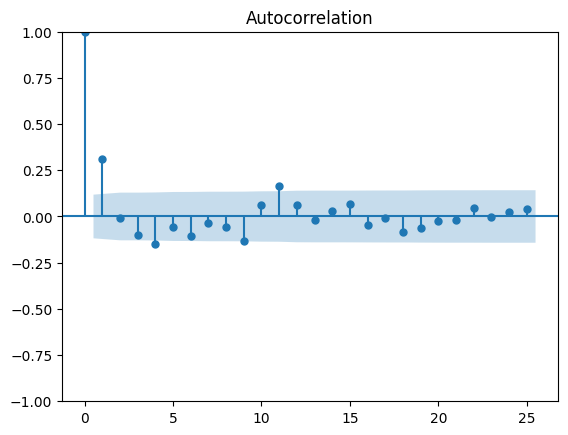

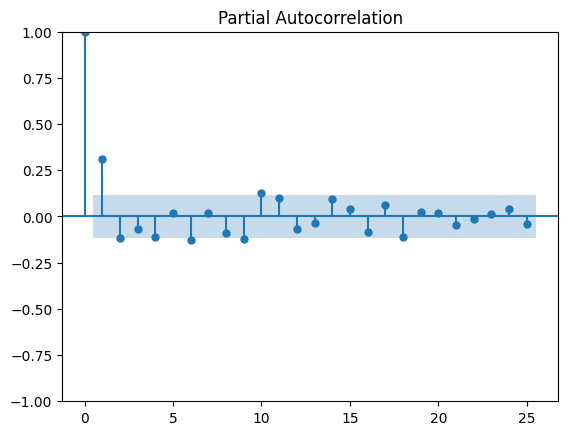

                               SARIMAX Results                                
Dep. Variable:                Regular   No. Observations:                  276
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -469.191
Date:                Fri, 02 Aug 2024   AIC                            944.382
Time:                        02:59:10   BIC                            955.232
Sample:                             0   HQIC                           948.736
                                - 276                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0443      0.116      0.382      0.702      -0.183       0.271
ma.L1          0.2989      0.106      2.821      0.005       0.091       0.507
sigma2         1.7753      0.107     16.561      0.0

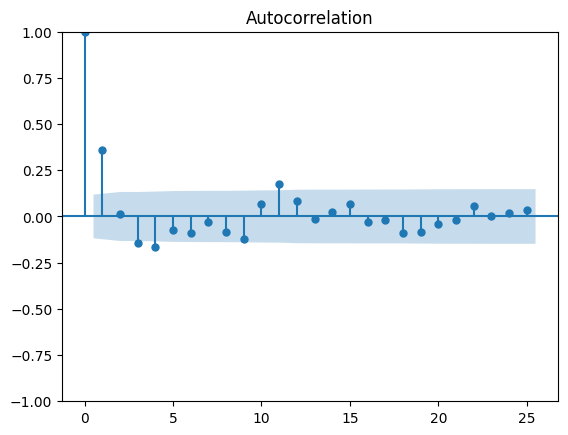

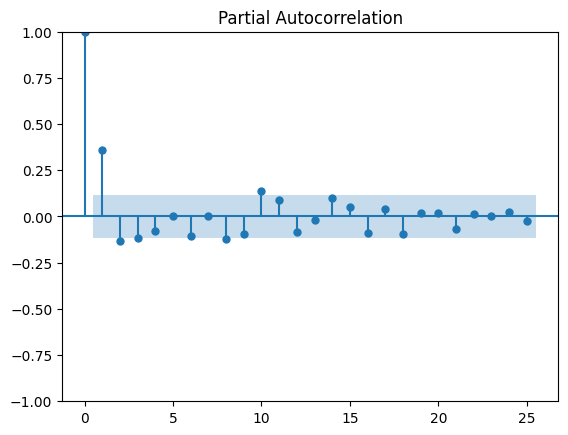

                               SARIMAX Results                                
Dep. Variable:                  Super   No. Observations:                  276
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -459.494
Date:                Fri, 02 Aug 2024   AIC                            924.987
Time:                        02:59:11   BIC                            935.838
Sample:                             0   HQIC                           929.342
                                - 276                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1668      0.117      1.421      0.155      -0.063       0.397
ma.L1          0.2301      0.110      2.098      0.036       0.015       0.445
sigma2         1.6542      0.117     14.116      0.0

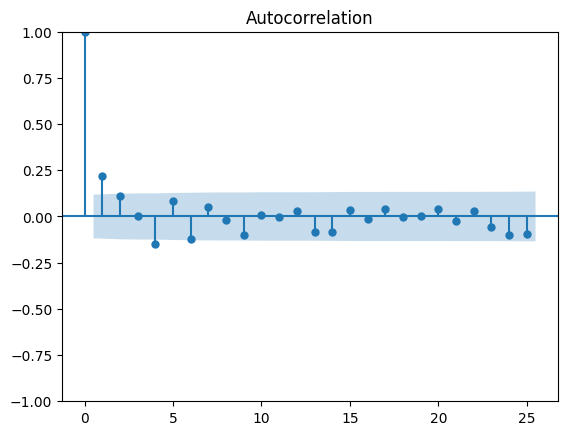

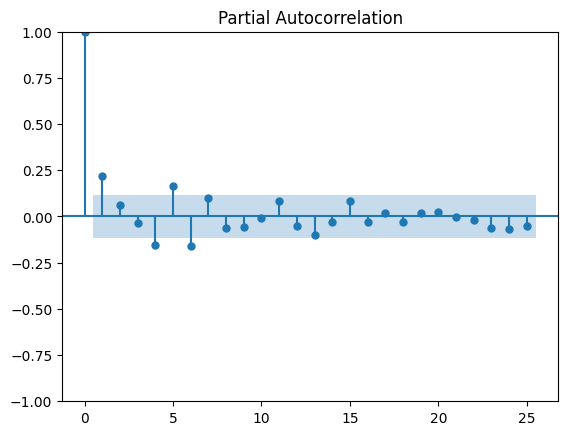

                               SARIMAX Results                                
Dep. Variable:                 Diesel   No. Observations:                  276
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -482.942
Date:                Fri, 02 Aug 2024   AIC                            971.883
Time:                        02:59:13   BIC                            982.734
Sample:                             0   HQIC                           976.238
                                - 276                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3874      0.162      2.390      0.017       0.070       0.705
ma.L1         -0.1759      0.173     -1.015      0.310      -0.516       0.164
sigma2         1.9625      0.090     21.893      0.0

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Gráfico de autocorrelación y autocorrelación parcial
plot_acf(precios_df['Regular_diff'].dropna())
plot_pacf(precios_df['Regular_diff'].dropna())
plt.show()

# Modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(precios_df['Regular'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# Gráfico de autocorrelación y autocorrelación parcial
plot_acf(precios_df['Super_diff'].dropna())
plot_pacf(precios_df['Super_diff'].dropna())
plt.show()

# Modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(precios_df['Super'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())


# Gráfico de autocorrelación y autocorrelación parcial
plot_acf(precios_df['Diesel_diff'].dropna())
plot_pacf(precios_df['Diesel_diff'].dropna())
plt.show()

# Modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(precios_df['Diesel'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())



In [37]:
from statsmodels.tsa.arima.model import ARIMA

# Crear y ajustar los modelos ARIMA
model_1_1 = ARIMA(precios_df['Regular'], order=(1, 1, 1))
model_1_1_fit = model_1_1.fit()

model_2_1 = ARIMA(precios_df['Regular'], order=(2, 1, 1))
model_2_1_fit = model_2_1.fit()

model_3_1 = ARIMA(precios_df['Regular'], order=(1, 1, 2))
model_3_1_fit = model_3_1.fit()

# Comparar AIC y BIC
models_comparison_regular = pd.DataFrame({
    'Model': ['ARIMA(1,1,1)', 'ARIMA(2,1,1)', 'ARIMA(1,1,2)'],
    'AIC': [model_1_1_fit.aic, model_2_1_fit.aic, model_3_1_fit.aic],
    'BIC': [model_1_1_fit.bic, model_2_1_fit.bic, model_3_1_fit.bic]
})

# Crear y ajustar los modelos ARIMA
model_1_2 = ARIMA(precios_df['Super'], order=(1, 1, 1))
model_1_2_fit = model_1_2.fit()

model_2_2 = ARIMA(precios_df['Super'], order=(2, 1, 1))
model_2_2_fit = model_2_2.fit()

model_3_2 = ARIMA(precios_df['Super'], order=(1, 1, 2))
model_3_2_fit = model_3_2.fit()

# Comparar AIC y BIC
models_comparison_super = pd.DataFrame({
    'Model': ['ARIMA(1,1,1)', 'ARIMA(2,1,1)', 'ARIMA(1,1,2)'],
    'AIC': [model_1_2_fit.aic, model_2_2_fit.aic, model_3_2_fit.aic],
    'BIC': [model_1_2_fit.bic, model_2_2_fit.bic, model_3_2_fit.bic]
})

# Crear y ajustar los modelos ARIMA
model_1_3 = ARIMA(precios_df['Diesel'], order=(1, 1, 1))
model_1_3_fit = model_1_3.fit()

model_2_3 = ARIMA(precios_df['Diesel'], order=(2, 1, 1))
model_2_3_fit = model_2_3.fit()

model_3_3 = ARIMA(precios_df['Diesel'], order=(1, 1, 2))
model_3_3_fit = model_3_3.fit()

# Comparar AIC y BIC
models_comparison_diesel = pd.DataFrame({
    'Model': ['ARIMA(1,1,1)', 'ARIMA(2,1,1)', 'ARIMA(1,1,2)'],
    'AIC': [model_1_3_fit.aic, model_2_3_fit.aic, model_3_3_fit.aic],
    'BIC': [model_1_3_fit.bic, model_2_3_fit.bic, model_3_3_fit.bic]
})

models_comparison_regular, models_comparison_super, models_comparison_diesel



(          Model         AIC         BIC
 0  ARIMA(1,1,1)  944.381807  955.232120
 1  ARIMA(2,1,1)  940.878287  955.345372
 2  ARIMA(1,1,2)  943.608622  958.075706,
           Model         AIC         BIC
 0  ARIMA(1,1,1)  924.987299  935.837613
 1  ARIMA(2,1,1)  918.785695  933.252779
 2  ARIMA(1,1,2)  925.847469  940.314553,
           Model         AIC         BIC
 0  ARIMA(1,1,1)  971.883425  982.733738
 1  ARIMA(2,1,1)  967.481077  981.948161
 2  ARIMA(1,1,2)  972.234974  986.702059)

In [11]:
pip install prophet


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_m3_9j2z/dnhuxlux.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_m3_9j2z/o_da5ngw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91559', 'data', 'file=/tmp/tmp_m3_9j2z/dnhuxlux.json', 'init=/tmp/tmp_m3_9j2z/o_da5ngw.json', 'output', 'file=/tmp/tmp_m3_9j2z/prophet_model0mrgjhbu/prophet_model-20240802032205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:22:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:22:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

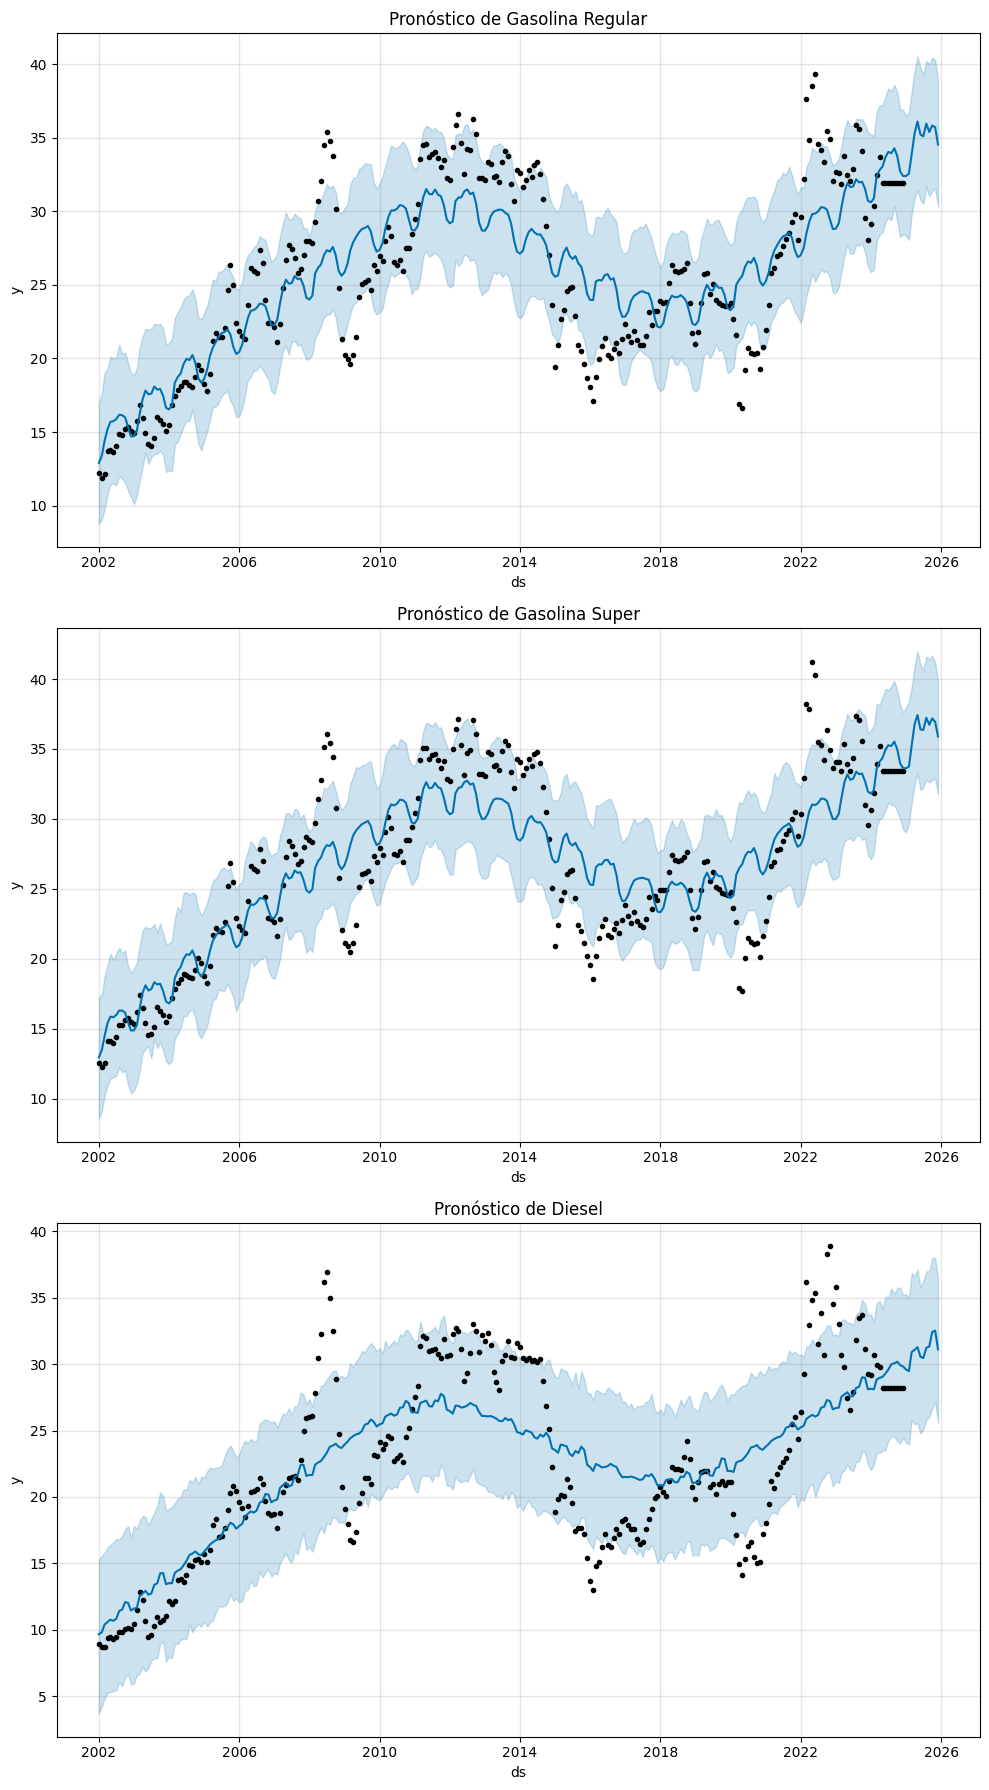

In [39]:
from prophet import Prophet

# Preparar y predecir con Prophet para Regular
prophet_df_regular = precios_df[['Fecha', 'Regular']].rename(columns={'Fecha': 'ds', 'Regular': 'y'})
prophet_model_regular = Prophet()
prophet_model_regular.fit(prophet_df_regular)
future_regular = prophet_model_regular.make_future_dataframe(periods=12, freq='M')
forecast_regular = prophet_model_regular.predict(future_regular)

# Preparar y predecir con Prophet para Super
prophet_df_super = precios_df[['Fecha', 'Super']].rename(columns={'Fecha': 'ds', 'Super': 'y'})
prophet_model_super = Prophet()
prophet_model_super.fit(prophet_df_super)
future_super = prophet_model_super.make_future_dataframe(periods=12, freq='M')
forecast_super = prophet_model_super.predict(future_super)

# Preparar y predecir con Prophet para Diesel
prophet_df_diesel = precios_df[['Fecha', 'Diesel']].rename(columns={'Fecha': 'ds', 'Diesel': 'y'})
prophet_model_diesel = Prophet()
prophet_model_diesel.fit(prophet_df_diesel)
future_diesel = prophet_model_diesel.make_future_dataframe(periods=12, freq='M')
forecast_diesel = prophet_model_diesel.predict(future_diesel)

# Graficar pronósticos
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Regular
prophet_model_regular.plot(forecast_regular, ax=axes[0])
axes[0].set_title('Pronóstico de Gasolina Regular')

# Super
prophet_model_super.plot(forecast_super, ax=axes[1])
axes[1].set_title('Pronóstico de Gasolina Super')

# Diesel
prophet_model_diesel.plot(forecast_diesel, ax=axes[2])
axes[2].set_title('Pronóstico de Diesel')

plt.tight_layout()
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error

# Regular
# Pronóstico ARIMA para Regular
arima_forecast_regular = model_3_1_fit.forecast(steps=12)
# Seleccionar las últimas 12 filas de 'Regular' para el cálculo del RMSE
consumo_regular_last_12 = precios_df['Regular'].iloc[-12:].values
arima_rmse_regular = mean_squared_error(consumo_regular_last_12, arima_forecast_regular, squared=False)
print('Regular - ARIMA RMSE:', arima_rmse_regular)

# Pronóstico Prophet para Regular
prophet_forecast_regular = forecast_regular.set_index('ds').iloc[-12:]['yhat']
prophet_forecast_values_regular = prophet_forecast_regular.values
# Asegurarse de que las predicciones y los valores reales tienen el mismo tamaño
assert len(consumo_regular_last_12) == len(prophet_forecast_values_regular), "Inconsistent number of samples between actual and forecasted values"
prophet_rmse_regular = mean_squared_error(consumo_regular_last_12, prophet_forecast_values_regular, squared=False)
print('Regular - Prophet RMSE:', prophet_rmse_regular)

# Super
# Pronóstico ARIMA para Super
arima_forecast_super = model_2_2_fit.forecast(steps=12)
# Seleccionar las últimas 12 filas de 'Super' para el cálculo del RMSE
consumo_super_last_12 = precios_df['Super'].iloc[-12:].values
arima_rmse_super = mean_squared_error(consumo_super_last_12, arima_forecast_super, squared=False)
print('Super - ARIMA RMSE:', arima_rmse_super)

# Pronóstico Prophet para Super
prophet_forecast_super = forecast_super.set_index('ds').iloc[-12:]['yhat']
prophet_forecast_values_super = prophet_forecast_super.values
# Asegurarse de que las predicciones y los valores reales tienen el mismo tamaño
assert len(consumo_super_last_12) == len(prophet_forecast_values_super), "Inconsistent number of samples between actual and forecasted values"
prophet_rmse_super = mean_squared_error(consumo_super_last_12, prophet_forecast_values_super, squared=False)
print('Super - Prophet RMSE:', prophet_rmse_super)

# Diesel
# Pronóstico ARIMA para Diesel
arima_forecast_diesel = model_2_3_fit.forecast(steps=12)
# Seleccionar las últimas 12 filas de 'Diesel' para el cálculo del RMSE
consumo_diesel_last_12 = precios_df['Diesel'].iloc[-12:].values
arima_rmse_diesel = mean_squared_error(consumo_diesel_last_12, arima_forecast_diesel, squared=False)
print('Diesel - ARIMA RMSE:', arima_rmse_diesel)

# Pronóstico Prophet para Diesel
prophet_forecast_diesel = forecast_diesel.set_index('ds').iloc[-12:]['yhat']
prophet_forecast_values_diesel = prophet_forecast_diesel.values
# Asegurarse de que las predicciones y los valores reales tienen el mismo tamaño
assert len(consumo_diesel_last_12) == len(prophet_forecast_values_diesel), "Inconsistent number of samples between actual and forecasted values"
prophet_rmse_diesel = mean_squared_error(consumo_diesel_last_12, prophet_forecast_values_diesel, squared=False)
print('Diesel - Prophet RMSE:', prophet_rmse_diesel)


Regular - ARIMA RMSE: 1.0720549739944
Regular - Prophet RMSE: 3.2044397047540385
Super - ARIMA RMSE: 1.071079245625959
Super - Prophet RMSE: 3.0064102525565666
Diesel - ARIMA RMSE: 0.963047961165689
Diesel - Prophet RMSE: 2.7399854235720484
